In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.utils import shuffle
import re
import string 
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns
from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pandas import DataFrame
from plotly.offline import iplot
from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [2]:
df = pd.read_csv("news.csv", sep=',')

In [3]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [4]:
df.loc[df.label=="FAKE",'fake']=1
df.loc[df.label=="REAL",'fake']=0
df=df.drop('label',axis=1)

In [5]:
df.head()

,title,text,fake
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1.0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1.0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0.0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1.0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0.0


In [6]:
df.shape

(6335, 3)

In [7]:
df.isnull().sum()

title    0
text     0
fake     0
dtype: int64

In [8]:
df = df.fillna('')

In [9]:
df.isnull().sum()

title    0
text     0
fake     0
dtype: int64

In [10]:
df['text'] = df['title']

In [11]:
df=shuffle(df).reset_index(drop=True)

In [12]:
# On retire les ponctuations ?

#Note : on pourrait pas les utiliser ?

def remove_punct(_str):
  _str = re.sub('['+string.punctuation+']', ' ', _str)
  _str = re.sub('[\r]', ' ', _str)
  _str = re.sub('[\n]', ' ', _str)
  return _str

df['text'] = df['text'].apply(remove_punct)

In [13]:
# On exclue les stopwords en anglais 

stop_words=stopwords.words('english')
df["text_without_stopwords"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [14]:
# On transformer notre texte en plusieurs mots séparés par des espaces.
df['tokenized_text'] = df.apply(lambda row: word_tokenize(row['text_without_stopwords']), axis=1)

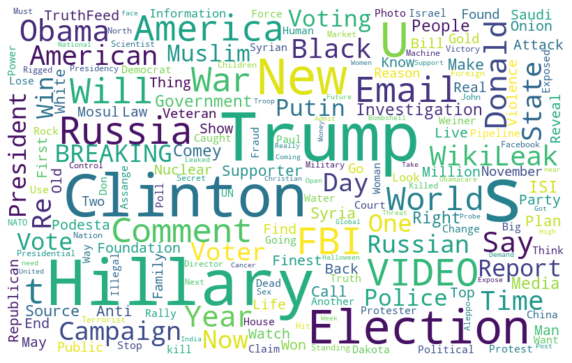

In [15]:
df_fake = df[df["fake"] == 1]
collect_words = ' '.join([txt for txt in df_fake.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color="white").generate(collect_words)
plot.figure(figsize=(10,7))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

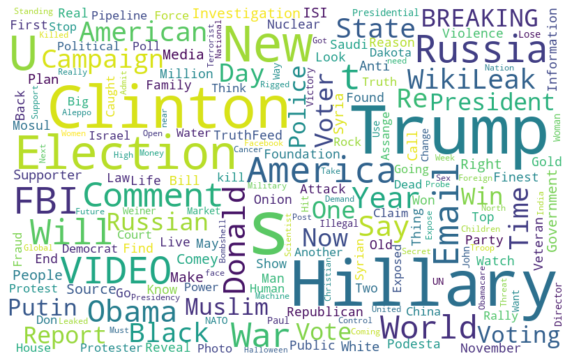

In [16]:
df_true = df[df["fake"] == 0]
collect_words = ' '.join([txt for txt in df_fake.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color="white").generate(collect_words)
plot.figure(figsize=(10,7))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

In [17]:
x = df["text_without_stopwords"]
y = df["fake"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## XG BOOST

In [27]:
XGB = GradientBoostingClassifier(random_state=0)
XGB.fit(xv_train, y_train)
pred_rfc = XGB.predict(xv_test)

XGB.score(xv_test, y_test)

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.82      0.67      0.74       802
         1.0       0.72      0.85      0.78       782

    accuracy                           0.76      1584
   macro avg       0.77      0.76      0.76      1584
weighted avg       0.77      0.76      0.76      1584

[[540 262]
 [121 661]]


In [29]:
param_grid = { 
    'n_estimators': [100 ,200, 500],
    'learning_rate': [0.01 ,0.1, 0.5],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae']
}

In [ ]:
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid,cv=10)
grid_resultat_XGB = CV_XGB.fit(xv_train, y_train)
grid_resultat_XGB.best_params_

C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\rmani\Anaconda3\lib\sit

C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\rmani\Anaconda3\lib\sit

C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\rmani\Anaconda3\lib\sit

C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\rmani\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\rmani\Anaconda3\lib\sit

## Arbre de decision

In [20]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(xv_train, y_train)
pred_rfc = DTC.predict(xv_test)

DTC.score(xv_test, y_test)

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       802
         1.0       0.77      0.74      0.75       782

    accuracy                           0.76      1584
   macro avg       0.76      0.76      0.76      1584
weighted avg       0.76      0.76      0.76      1584

[[631 171]
 [205 577]]


In [ ]:
param_grid = { 
    'min_samples_split' : np.arrange[2,10,2],
    'max_features': [None,'auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid,cv=10)
grid_resultat_XGB = CV_XGB.fit(xv_train, y_train)
grid_resultat_XGB.best_params_

## Random Forest

In [18]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)

RFC.score(xv_test, y_test)

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       802
         1.0       0.78      0.83      0.80       782

    accuracy                           0.80      1584
   macro avg       0.80      0.80      0.80      1584
weighted avg       0.80      0.80      0.80      1584

[[621 181]
 [134 648]]


In [19]:
rfc=RandomForestClassifier(random_state=42)

In [20]:
param_grid = { 
    'n_estimators': [100 ,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [21]:
CV_rtf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=10)
grid_resultat_rtf = CV_rtf.fit(xv_train, y_train)

In [22]:
grid_resultat_rtf.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}

In [23]:
rtf = grid_resultat_rtf.best_estimator_
rtf.score(xv_test, y_test)
y_pred = rtf.predict(xv_test)

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[661 130]
 [131 662]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       791
         1.0       0.84      0.83      0.84       793

    accuracy                           0.84      1584
   macro avg       0.84      0.84      0.84      1584
weighted avg       0.84      0.84      0.84      1584

